In [ ]:
!pip install git+https://github.com/business-science/ai-data-science-team.git --upgrade

  Cloning https://github.com/business-science/ai-data-science-team.git to /tmp/pip-req-build-vi09ox9n
  Running command git clone --filter=blob:none --quiet https://github.com/business-science/ai-data-science-team.git /tmp/pip-req-build-vi09ox9n
  Resolved https://github.com/business-science/ai-data-science-team.git to commit 4dcd59ea6c13f1d989a6e74ab248f1db7b724b70
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00
  Created wheel for ai-data-science-team: 

In [ ]:
%pip install -qU langchain-google-genai

In [ ]:
!pip install google-generativeai
!pip install langchain

In [ ]:


from IPython import get_ipython
from IPython.display import display
# %%
from langchain_google_genai import ChatGoogleGenerativeAI 
import pandas as pd
import h2o # pip install h2o
import os
import sys
import yaml
# Assuming H2OMLAgent is a class or function defined in h2o_ml_agent.py
from h2o_ml_agent import H2OMLAgent  # Import directly from the file


# %%



In [ ]:
import pandas as pd

# URL of the CSV file
url = "https://github.com/business-science/ai-data-science-team/blob/master/data/churn_data.csv?raw=true"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(url)

# Now you have the data in the 'df' DataFrame
# You can view the first few rows using:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
import os
import yaml
from langchain_google_genai import ChatGoogleGenerativeAI

# Load your Google AI API key from credentials.yml
os.environ["GOOGLE_API_KEY"] = '' # Assuming you have 'google_api_key' 

# Define constants
MODEL = "gemini-1.5-flash"  # Or another Gemini model
LOG = True
LOG_PATH = "logs/"
MODEL_PATH = "h2o_models/"

# Initialize the Gemini language model
llm = ChatGoogleGenerativeAI(model=MODEL)

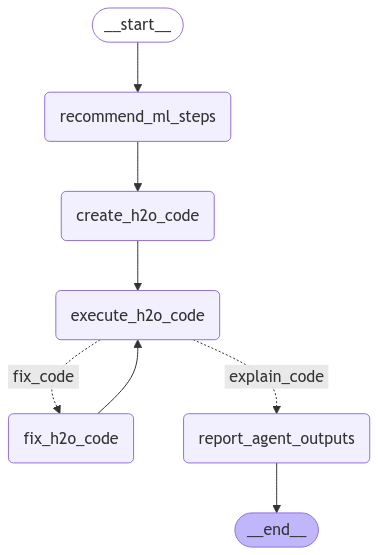

In [ ]:
ml_agent = H2OMLAgent(
    model=llm,
    log=True,
    log_path=LOG_PATH,
    model_directory=MODEL_PATH,
)
ml_agent

In [ ]:
ml_agent.invoke_agent(
    data_raw=df.drop(columns=["customerID"]),
    user_instructions="Please do classification on 'Churn'. Use a max runtime of 30 seconds.",
    target_variable="Churn"
)

---H2O ML AGENT----
    * RECOMMEND MACHINE LEARNING STEPS
    * CREATE H2O AUTOML CODE
      File saved to: logs/h2o_automl.py
    * EXECUTING AGENT CODE
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1gvynvpf
  JVM stdout: /tmp/tmp1gvynvpf/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1gvynvpf/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,2 months and 16 days
H2O_cluster_name:,H2O_from_python_unknownUser_o2f6cs
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
16:16:07.565: Stopping tolerance set by the user is < 70% of the recommended default of 0.011915743770127944, so models may take a long time to converge or may not converge at all.

███████████████████████████████████████████████████████████████| (done) 100%
    * REPORT AGENT OUTPUTS


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
# Retrieve and display the leaderboard of models
ml_agent.get_leaderboard()

,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
0,StackedEnsemble_BestOfFamily_3_AutoML_1_202501...,0.828748,0.442831,0.671785,0.246845,0.379960,0.144369,812,0.064934,StackedEnsemble
1,GBM_1_AutoML_1_20250118_161607,0.827883,0.442215,0.670207,0.252105,0.379940,0.144354,5096,0.051399,GBM
2,StackedEnsemble_BestOfFamily_1_AutoML_1_202501...,0.827028,0.444110,0.669671,0.256611,0.380711,0.144941,2704,0.067448,StackedEnsemble
3,StackedEnsemble_BestOfFamily_2_AutoML_1_202501...,0.827003,0.444111,0.670192,0.256611,0.380724,0.144951,1045,0.065075,StackedEnsemble
4,StackedEnsemble_AllModels_1_AutoML_1_20250118_...,0.826983,0.445882,0.668855,0.256166,0.381193,0.145308,1467,0.102063,StackedEnsemble
5,GBM_5_AutoML_1_20250118_161607,0.826978,0.491618,0.655175,0.234373,0.400645,0.160516,256,0.022425,GBM
6,XGBoost_3_AutoML_1_20250118_161607,0.824727,0.495452,0.650327,0.255176,0.398807,0.159047,405,0.013559,XGBoost
7,GLM_1_AutoML_1_20250118_161607,0.823502,0.450719,0.661665,0.262051,0.383898,0.147378,1657,0.015353,GLM
8,GBM_2_AutoML_1_20250118_161607,0.822817,0.448550,0.660398,0.244774,0.382572,0.146362,1244,0.037592,GBM
9,GBM_3_AutoML_1_20250118_161607,0.820297,0.452960,0.663698,0.241114,0.384997,0.148222,1588,0.036709,GBM


In [ ]:
# Get the H2O training function in markdown format
ml_agent.get_h2o_train_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: h2o_ml_agent
# Time Created: 2025-01-18 16:15:53

def h2o_automl(data_raw, model_directory=None, log_path=None):
    import h2o
    from h2o.automl import H2OAutoML
    import pandas as pd



    # Initialize or connect to H2O if not already started
    h2o.init()

    # Convert the pandas DataFrame to an H2OFrame
    data_h2o = h2o.H2OFrame(data_raw)
    
    # Identify the target variable
    y = "Churn"
    x = [col for col in data_h2o.columns if col != y]
    data_h2o[y] = data_h2o[y].asfactor() #Ensure Churn is a factor

    # AutoML parameters based on user instructions and recommended steps
    aml = H2OAutoML(
        max_runtime_secs=30,
        seed=1,
        exclude_algos=["DeepLearning"],
        nfolds=-1,
        stopping_metric="AUC",
        stopping_tolerance=0.001,
        stopping_rounds=3,
        sort_metric="AUC"
    )
    aml.train(x=x, y=y, training_frame=data_h2o)
    
    # Determine model saving logic
    if model_directory is None and log_path is None:
        model_path = None
    else:
        path_to_save = model_directory if model_directory else log_path
        model_path = h2o.save_model(model=aml.leader, path=path_to_save, force=True)
    
    return dict(
        leaderboard = h2o.automl.get_leaderboard(aml, extra_columns="ALL").as_data_frame().to_dict('records'),
        best_model_id = aml.leader.model_id,
        model_path = model_path,
    )
```

In [ ]:
# Get the recommended machine learning steps in markdown format
ml_agent.get_recommended_ml_steps(markdown=True)

# Recommended ML Steps:
Here's a numbered list of steps and considerations for performing H2O AutoML on the provided dataset, focusing on maximizing accuracy within the 30-second time constraint and excluding deep learning:

1. **Import Libraries and Initialize H2O:**  Start by importing necessary H2O libraries and initializing the H2O cluster.  This is standard H2O setup.

2. **Import the Dataset:** Import `Dataset_0` into H2O using `h2o.import_file()`.

3. **Define Target Variable:** Explicitly specify the target column: `y = "Churn"`.  The documentation indicates that for classification, the response column should be a factor. Ensure "Churn" is converted to a factor if it isn't already using `.asfactor()`.

4. **Configure AutoML Parameters:** Use the `H2OAutoML` class with the following parameters:

   * `max_runtime_secs = 30`: This adheres to the user's time constraint.
   * `seed = 1`: This ensures reproducibility.
   * `exclude_algos = ["DeepLearning"]`: This excludes Deep Learning models as instructed.
   * `nfolds = -1`:  Let AutoML decide between k-fold cross-validation or blending.  This is generally a good default.
   * `stopping_metric = "AUC"`: AUC is a suitable metric for binary classification and is often a good choice for early stopping.
   * `stopping_tolerance = 0.001`: This is a reasonable default tolerance for early stopping.  Adjust if necessary.
   * `stopping_rounds = 3`: This is a reasonable default value.  Adjust if necessary to allow more rounds before stopping.
   * `sort_metric = "AUC"`: Rank models based on AUC.

5. **Train the AutoML Model:** Initiate the AutoML process using `aml.train(x = x, y = y, training_frame = train)`.  Note that `x` would be a list of predictor columns (all columns except 'Churn'), which is handled implicitly unless you want to exclude specific predictors.

6. **Examine the Leaderboard:** After training, review the AutoML leaderboard (`aml.leaderboard`) to identify the top-performing model.  Consider the AUC, logloss, and other relevant metrics. The `extra_columns="ALL"` argument in `h2o.automl.get_leaderboard()` may offer further insights into model training time and prediction speed.


7. **Model Selection:** Select the best model based on the leaderboard. The Stacked Ensemble models are often strong candidates, but evaluate all top contenders based on your specific needs (AUC, training time, etc.).


8. **(Optional)  Further tuning**: If the 30-second limit allows, consider a second AutoML run with a subset of high-performing algorithms from the first run. This allows more time for hyperparameter tuning of promising models.  For instance, if XGBoost performed well, you could re-run AutoML focusing only on XGBoost, potentially improving accuracy.


This approach prioritizes accuracy within the time constraint by using an appropriate stopping metric and excluding computationally expensive algorithms.  The use of `nfolds=-1` allows AutoML to select the best approach for model evaluation and potentially improves performance.  The seed ensures reproducibility, and examining the leaderboard and model details gives a complete picture of the modeling results.

In [ ]:
# Get a summary of the workflow in markdown format
ml_agent.get_workflow_summary(markdown=True)

# H2O Machine Learning Agent Outputs

## ---RECOMMENDED STEPS----
# Recommended ML Steps:
Here's a numbered list of steps and considerations for performing H2O AutoML on the provided dataset, focusing on maximizing accuracy within the 30-second time constraint and excluding deep learning:

1. **Import Libraries and Initialize H2O:**  Start by importing necessary H2O libraries and initializing the H2O cluster.  This is standard H2O setup.

2. **Import the Dataset:** Import `Dataset_0` into H2O using `h2o.import_file()`.

3. **Define Target Variable:** Explicitly specify the target column: `y = "Churn"`.  The documentation indicates that for classification, the response column should be a factor. Ensure "Churn" is converted to a factor if it isn't already using `.asfactor()`.

4. **Configure AutoML Parameters:** Use the `H2OAutoML` class with the following parameters:

   * `max_runtime_secs = 30`: This adheres to the user's time constraint.
   * `seed = 1`: This ensures reproducibility.
   * `exclude_algos = ["DeepLearning"]`: This excludes Deep Learning models as instructed.
   * `nfolds = -1`:  Let AutoML decide between k-fold cross-validation or blending.  This is generally a good default.
   * `stopping_metric = "AUC"`: AUC is a suitable metric for binary classification and is often a good choice for early stopping.
   * `stopping_tolerance = 0.001`: This is a reasonable default tolerance for early stopping.  Adjust if necessary.
   * `stopping_rounds = 3`: This is a reasonable default value.  Adjust if necessary to allow more rounds before stopping.
   * `sort_metric = "AUC"`: Rank models based on AUC.

5. **Train the AutoML Model:** Initiate the AutoML process using `aml.train(x = x, y = y, training_frame = train)`.  Note that `x` would be a list of predictor columns (all columns except 'Churn'), which is handled implicitly unless you want to exclude specific predictors.

6. **Examine the Leaderboard:** After training, review the AutoML leaderboard (`aml.leaderboard`) to identify the top-performing model.  Consider the AUC, logloss, and other relevant metrics. The `extra_columns="ALL"` argument in `h2o.automl.get_leaderboard()` may offer further insights into model training time and prediction speed.


7. **Model Selection:** Select the best model based on the leaderboard. The Stacked Ensemble models are often strong candidates, but evaluate all top contenders based on your specific needs (AUC, training time, etc.).


8. **(Optional)  Further tuning**: If the 30-second limit allows, consider a second AutoML run with a subset of high-performing algorithms from the first run. This allows more time for hyperparameter tuning of promising models.  For instance, if XGBoost performed well, you could re-run AutoML focusing only on XGBoost, potentially improving accuracy.


This approach prioritizes accuracy within the time constraint by using an appropriate stopping metric and excluding computationally expensive algorithms.  The use of `nfolds=-1` allows AutoML to select the best approach for model evaluation and potentially improves performance.  The seed ensures reproducibility, and examining the leaderboard and model details gives a complete picture of the modeling results.

## ---H2O TRAIN FUNCTION----
```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: h2o_ml_agent
# Time Created: 2025-01-18 16:15:53

def h2o_automl(data_raw, model_directory=None, log_path=None):
    import h2o
    from h2o.automl import H2OAutoML
    import pandas as pd



    # Initialize or connect to H2O if not already started
    h2o.init()

    # Convert the pandas DataFrame to an H2OFrame
    data_h2o = h2o.H2OFrame(data_raw)
    
    # Identify the target variable
    y = "Churn"
    x = [col for col in data_h2o.columns if col != y]
    data_h2o[y] = data_h2o[y].asfactor() #Ensure Churn is a factor

    # AutoML parameters based on user instructions and recommended steps
    aml = H2OAutoML(
        max_runtime_secs=30,
        seed=1,
        exclude_algos=["DeepLearning"],
        nfolds=-1,
        stopping_metric="AUC",
        stopping_tolerance=0.001,
        stopping_rounds=3,
        sort_metric="AUC"
    )
    aml.train(x=x, y=y, training_frame=data_h2o)
    
    # Determine model saving logic
    if model_directory is None and log_path is None:
        model_path = None
    else:
        path_to_save = model_directory if model_directory else log_path
        model_path = h2o.save_model(model=aml.leader, path=path_to_save, force=True)
    
    return dict(
        leaderboard = h2o.automl.get_leaderboard(aml, extra_columns="ALL").as_data_frame().to_dict('records'),
        best_model_id = aml.leader.model_id,
        model_path = model_path,
    )
```

## ---H2O TRAIN FUNCTION PATH----
```python
logs/h2o_automl.py
```

## ---H2O TRAIN FUNCTION NAME----
```python
h2o_automl
```

## ---H2O TRAIN ERROR----
None

## ---MODEL PATH----
None

## ---BEST MODEL ID----
StackedEnsemble_BestOfFamily_3_AutoML_1_20250118_161607

In [ ]:
# Get a summary of the logs in markdown format
ml_agent.get_log_summary(markdown=True)


## H2O Machine Learning Agent Log Summary:

Function Path: logs/h2o_automl.py

Function Name: h2o_automl

Best Model ID: StackedEnsemble_BestOfFamily_3_AutoML_1_20250118_161607

Model Path: None
                

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,5 mins 09 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,2 months and 16 days
H2O_cluster_name:,H2O_from_python_unknownUser_o2f6cs
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.161 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Load the model
model = h2o.get_model(ml_agent.get_best_model_id())

model

key,value
Stacking strategy,blending
Number of base models (used / total),3/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),0/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0
Metalearner fold_column,None


In [ ]:
# Make predictions using the loaded model
model.predict(h2o.H2OFrame(df))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,No,Yes
Yes,0.355647,0.644353
No,0.946696,0.0533042
Yes,0.663386,0.336614
No,0.957939,0.0420608
Yes,0.308295,0.691705
Yes,0.168135,0.831865
Yes,0.611535,0.388465
Yes,0.703575,0.296425
Yes,0.454634,0.545366
No,0.97595,0.0240505
